**Introduction**

##This notebook aims to build a ML-based model (Random Forest) for the classification of organoids based on features extracted (texture, shape, and color) from the organoids images dataset.




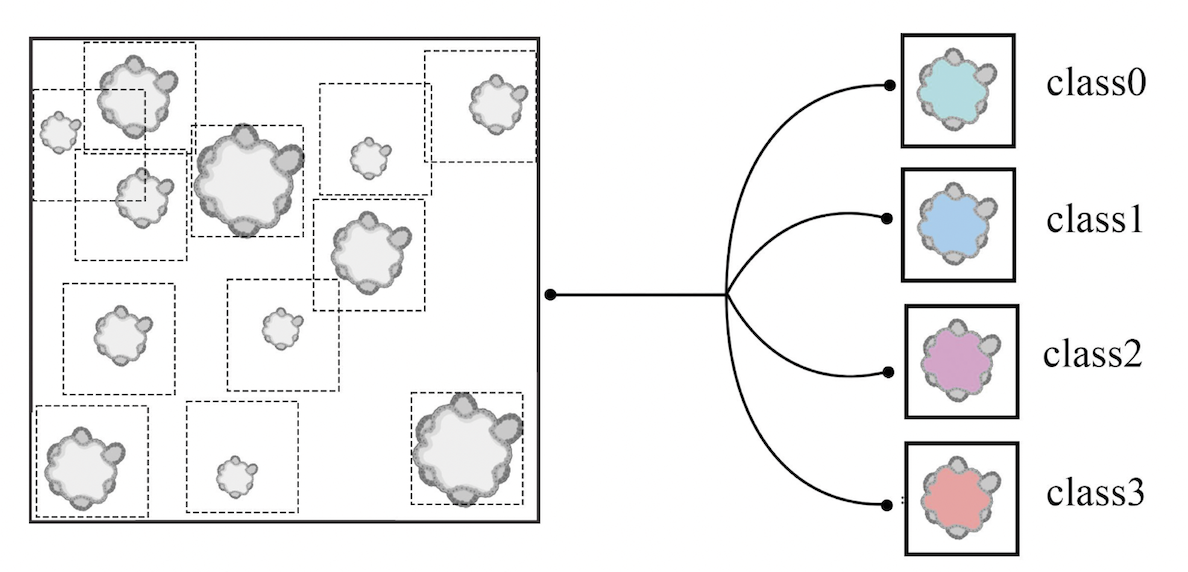
###The notebook consists of a group of code cells. To run them you have to press the play icon next to the cell to run and wait until the green check appears on the left of the code box. The green check next to the code indicates that the cell has been run.


## Table of Contents
1. [Data Loading](#data_loading)
2. [Data Preprocessing](#data_preprocess)
3. [Model Training](#model_training)
4. [Model Evaluation](#evaluation)


## Data Loading <a name="data_loading"></a>


In [ ]:
#Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount Google Drive for file access
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Load the training, validation, and test datasets from appropriate sources
#train_path = 'D:\HDD Giovanni\Desktop\dataset_new_FEATURES\dataset_train.xlsx'
#val_path = 'D:\HDD Giovanni\Desktop\dataset_new_FEATURES\dataset_val.xlsx'
#test_path = 'D:\HDD Giovanni\Desktop\dataset_new_FEATURES\dataset_test.xlsx'

train_path = '/content/drive/MyDrive/ORGANOIDS_EXPERIMENTS/Features Dataset/dataset_train.xlsx'
val_path = '/content/drive/MyDrive/ORGANOIDS_EXPERIMENTS/Features Dataset/dataset_val.xlsx'
test_path = '/content/drive/MyDrive/ORGANOIDS_EXPERIMENTS/Features Dataset/dataset_test.xlsx'


In [ ]:
#read excel
train_df = pd.read_excel(train_path)
val_df = pd.read_excel(val_path)
test_df = pd.read_excel(test_path)

In [ ]:
#print columns
train_df.columns

Index(['path', 'dimensions', 'mean_intensity', 'std_intensity', 'contrast_0',
       'contrast_45', 'contrast_90', 'contrast_135', 'dissimilarity_0',
       'dissimilarity_45', 'dissimilarity_90', 'dissimilarity_135',
       'homogeneity_0', 'homogeneity_45', 'homogeneity_90', 'homogeneity_135',
       'energy_0', 'energy_45', 'energy_90', 'energy_135', 'correlation_0',
       'correlation_45', 'correlation_90', 'correlation_135', 'mean_area',
       'max_solidity', 'mean_equivalent_diameter', 'mean_perimeter',
       'mean_irregularity_index', 'mean_convex_area', 'label'],
      dtype='object')

#Data Preprocessing <a name="data_preprocess" />

In [ ]:
# Prepare the feature sets (X) by dropping unnecessary columns ('path', 'dimensions', 'label') and
#extract the target labels (y) for training, validation, and test datasets.
X_train = train_df.drop(['path','dimensions', 'label'], axis=1)
y_train = train_df['label']

X_val = val_df.drop(['path','dimensions', 'label'], axis=1)
y_val = val_df['label']

X_test = test_df.drop(['path','dimensions', 'label'], axis=1)
y_test = test_df['label']

In [ ]:
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (18537, 28), (18537,)
Validation set shape: (2058, 28), (2058,)
Test set shape: (2468, 28), (2468,)


In [ ]:
## Check for any missing values (NaNs) in each feature column of the training dataset
# and return the count of missing values per column.
X_train.isna().sum()

mean_intensity                 0
std_intensity                  0
contrast_0                     0
contrast_45                    0
contrast_90                    0
contrast_135                   0
dissimilarity_0                0
dissimilarity_45               0
dissimilarity_90               0
dissimilarity_135              0
homogeneity_0                  0
homogeneity_45                 0
homogeneity_90                 0
homogeneity_135                0
energy_0                       0
energy_45                      0
energy_90                      0
energy_135                     0
correlation_0                  0
correlation_45                 0
correlation_90                 0
correlation_135                0
mean_area                      0
max_solidity                   0
mean_equivalent_diameter       0
mean_perimeter                 0
mean_irregularity_index     4248
mean_convex_area               0
dtype: int64

In [ ]:
# Replace infinite values (np.inf and -np.inf) with NaN in the 'mean_irregularity_index' column
X_train['mean_irregularity_index'].replace([np.inf, -np.inf], np.nan, inplace=True)
X_val['mean_irregularity_index'].replace([np.inf, -np.inf], np.nan, inplace=True)
X_test['mean_irregularity_index'].replace([np.inf, -np.inf], np.nan, inplace=True)

#Calculate the 50th percentile (median) from the training set's 'mean_irregularity_index' column
#and use this value to fill NaNs in the same column across all datasets.
percentile_50 = X_train['mean_irregularity_index'].describe()['50%']
X_train['mean_irregularity_index'].fillna(percentile_50, inplace=True)
X_val['mean_irregularity_index'].fillna(percentile_50, inplace=True)
X_test['mean_irregularity_index'].fillna(percentile_50, inplace=True)

# Confirm that all NaN values have been successfully replaced
print(X_train['mean_irregularity_index'].isna().sum())
print(X_val['mean_irregularity_index'].isna().sum())
print(X_test['mean_irregularity_index'].isna().sum())


0
0
0


In [ ]:
#re-check NaN
X_train.isna().sum()
X_val.isna().sum()
X_test.isna().sum()

mean_intensity              0
std_intensity               0
contrast_0                  0
contrast_45                 0
contrast_90                 0
contrast_135                0
dissimilarity_0             0
dissimilarity_45            0
dissimilarity_90            0
dissimilarity_135           0
homogeneity_0               0
homogeneity_45              0
homogeneity_90              0
homogeneity_135             0
energy_0                    0
energy_45                   0
energy_90                   0
energy_135                  0
correlation_0               0
correlation_45              0
correlation_90              0
correlation_135             0
mean_area                   0
max_solidity                0
mean_equivalent_diameter    0
mean_perimeter              0
mean_irregularity_index     0
mean_convex_area            0
dtype: int64

In [ ]:
# Import the StandardScaler from scikit-learn for feature scaling.
from sklearn.preprocessing import StandardScaler

#Create an instance of the scaler and fit it only to the training features,
#then apply the transformation to the training data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use the fitted scaler to transform the validation and test features to ensure consistent scaling across all datasets.
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


## Model Training <a name="model_training"></a>


In [ ]:
#Import necessary modules for building and evaluating a Random Forest model.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib

# Define the base Random Forest model.
rf = RandomForestClassifier(random_state=42)


#Create a dictionary of hyperparameters to test using GridSearchCV.
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


# Configure GridSearchCV to search for the best combination of hyperparameters using cross-validation.
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

#Perform hyperparameter tuning by fitting the grid search to the scaled training data.
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best model and its parameters found by the grid search.
best_rf = grid_search.best_estimator_
best_params_rf = grid_search.best_params_

# Save the best model to disk
joblib.dump(best_rf, 'best_random_forest_model.joblib')


# Evaluate the best model's performance on the validation set and print the accuracy.
val_predictions = best_rf.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
print(best_params_rf)
print(best_rf)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Validation Accuracy: 66.08%
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
RandomForestClassifier(min_samples_split=5, n_estimators=300, random_state=42)


## Model Evaluation <a name="evaluation"></a>

In [ ]:
# Evaluate the best Random Forest model on the test set to determine its performance on unseen data.
RF_predictions = best_rf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, RF_predictions)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

Test Accuracy: 64.42%


In [ ]:
# Import necessary modules for calculating and visualizing the confusion matrix.
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, RF_predictions)
cm


array([[1147,  106,   23,   18],
       [ 293,  186,   52,   17],
       [ 132,   90,  165,   14],
       [ 111,   15,    7,   92]], dtype=int64)

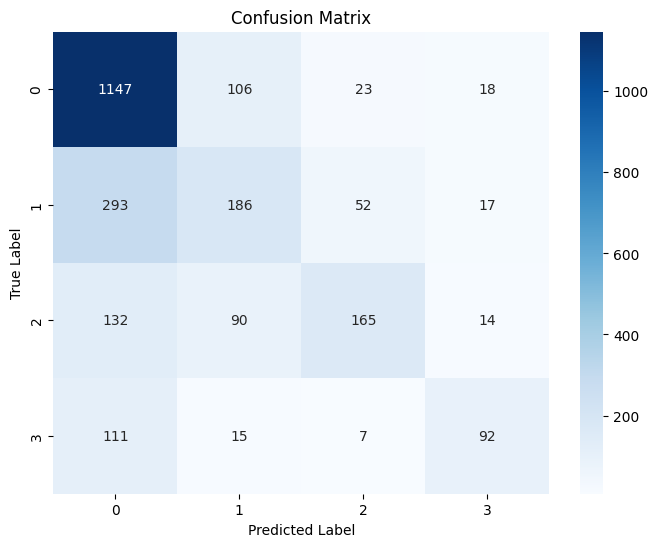

In [ ]:
# View confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1','2','3'], yticklabels=['0', '1','2','3'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#COMPUTE ALL METRICS FROM CONFUSION MATRIX

# This code block computes various classification metrics derived from a confusion matrix
#to evaluate the performance of a model.

import matplotlib.pyplot as plt

# Define the confusion matrix manually
confusion_mtx = np.array([[1147, 106, 23, 18],
                          [293, 186, 52, 17],
                          [132, 90, 165, 14],
                          [111, 15, 7, 92]])

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Function to neatly print the confusion matrix
def print_confusion_matrix(matrix):
    print("Confusion Matrix:")
    print("array(", end='')
    for i, row in enumerate(matrix):
        if i == 0:
            print("[", end='')
        else:
            print("       [", end='')

        for j, value in enumerate(row):
            end_char = ", " if j < len(row) - 1 else "]"
            print(f"{value:>4}", end=end_char)

        if i < len(matrix) - 1:
            print(",")
        else:
            print("])")

# Test the function by printing the manually defined confusion matrix
matrix =confusion_mtx
print_confusion_matrix(matrix)

# Compute key metrics from the confusion matrix:

# True positives
TP = np.diag(matrix)
print ('TP:',TP)
# False positives
FP = matrix.sum(axis=0) - TP
print ('FP:',FP)
# False negatives
FN = matrix.sum(axis=1) - TP
print ('FN:',FN)
# True negatives
TN = matrix.sum() - (FP + FN + TP)
print ('TN:',TN)
# Overall accuracy
overall_accuracy = TP.sum() / matrix.sum()
print ('ACC:',overall_accuracy)
# Sensitivity/Recall
sensitivity = TP / (TP + FN)
print ('SENS:',sensitivity)
# Specificity
specificity = TN / (TN + FP)
print ('SPEC:',specificity)
# Precision
precision = TP / (TP + FP)
print ('PREC:',precision)
# F1 Score
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
print ('F1:',f1_score)

# Matthews Correlation Coefficient (MCC)
MCC = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
print('MCC:', MCC)

# Compute and print the overall metrics by averaging across all classes
print ('OVERALL_SENS:',sensitivity.mean())
print ('OVERALL_SPEC:',specificity.mean())
print ('OVERALL_PREC:',precision.mean())
print ('OVERALL_F1:',f1_score.mean())
print ('OVERALL_MCC:',MCC.mean())
